# Data Preprocessing on the training data

## Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
train_dataset = pd.read_csv('Crime Data_2001_2012.csv')
test_dataset = pd.read_csv('Crime Data_2013.csv')

##Removing Total value Rows from the dataset

In [ ]:
total_vals = (train_dataset == 'TOTAL').any(axis=1)
for i in reversed(range(len(total_vals))):
  if total_vals[i]:
    train_dataset.drop(train_dataset.index[i],inplace=True)
train_dataset.reset_index(drop=True,inplace=True)
print(train_dataset)

            STATE/UT       DISTRICT  ...  OTHER IPC CRIMES  TOTAL IPC CRIMES
0     ANDHRA PRADESH       ADILABAD  ...              1518              4154
1     ANDHRA PRADESH      ANANTAPUR  ...               754              4125
2     ANDHRA PRADESH       CHITTOOR  ...              1262              5818
3     ANDHRA PRADESH       CUDDAPAH  ...              1181              3140
4     ANDHRA PRADESH  EAST GODAVARI  ...              2313              6507
...              ...            ...  ...               ...               ...
8604        DELHI UT            STF  ...                 1                 6
8605        DELHI UT           WEST  ...              1144              5558
8606     LAKSHADWEEP    LAKSHADWEEP  ...                32                60
8607      PUDUCHERRY       KARAIKAL  ...               392               787
8608      PUDUCHERRY     PUDUCHERRY  ...              1668              3494

[8609 rows x 33 columns]


In [ ]:
total_vals = (test_dataset == 'ZZ TOTAL').any(axis=1)
for i in reversed(range(len(total_vals))):
  if total_vals[i]:
    test_dataset.drop(test_dataset.index[i],inplace=True)
test_dataset.reset_index(drop=True,inplace=True)
print(test_dataset)

           STATE/UT     DISTRICT  ...  OTHER IPC CRIMES  TOTAL IPC CRIMES
0    Andhra Pradesh     ADILABAD  ...              1390              6381
1    Andhra Pradesh    ANANTAPUR  ...              1634              6913
2    Andhra Pradesh     CHITTOOR  ...              2239              5610
3    Andhra Pradesh     CUDDAPAH  ...              1741              7048
4    Andhra Pradesh    CYBERABAD  ...              3139             19992
..              ...          ...  ...               ...               ...
783        Delhi UT          STF  ...                 4                15
784        Delhi UT         WEST  ...              2393              8813
785     Lakshadweep  LAKSHADWEEP  ...                18                40
786      Puducherry     KARAIKAL  ...               329               643
787      Puducherry   PUDUCHERRY  ...              1464              3113

[788 rows x 33 columns]


##Extracting useful data such as districts, year and crime features. While removing total crimes per district column

In [ ]:
x_train_vals = train_dataset.iloc[:,1:-1].values
x_test_vals = test_dataset.iloc[:,1:-1].values

In [ ]:
print(x_train_vals)

[['ADILABAD' 2001 101 ... 0 181 1518]
 ['ANANTAPUR' 2001 151 ... 0 270 754]
 ['CHITTOOR' 2001 101 ... 0 404 1262]
 ...
 ['LAKSHADWEEP' 2012 0 ... 0 0 32]
 ['KARAIKAL' 2012 5 ... 0 44 392]
 ['PUDUCHERRY' 2012 24 ... 0 219 1668]]


In [ ]:
print(x_test_vals)

[['ADILABAD' 2013 96 ... 0 376 1390]
 ['ANANTAPUR' 2013 156 ... 0 573 1634]
 ['CHITTOOR' 2013 72 ... 0 546 2239]
 ...
 ['LAKSHADWEEP' 2013 0 ... 0 0 18]
 ['KARAIKAL' 2013 6 ... 0 32 329]
 ['PUDUCHERRY' 2013 25 ... 0 206 1464]]


##Keeping copy of this data for future alterations

In [ ]:
X_train = x_train_vals
X_test = x_test_vals

#Applying Kmeans Algorithm 

In [ ]:
print(X_train)

[['ADILABAD' 2001 1.15834478099478 ... -0.07243098488497635
  0.406186562461889 0.21914665054412608]
 ['ANANTAPUR' 2001 2.240488258804757 ... -0.07243098488497635
  0.9732153426377105 -0.2568454995502764]
 ['CHITTOOR' 2001 1.15834478099478 ... -0.07243098488497635
  1.826944067846251 0.05965189868003309]
 ...
 ['LAKSHADWEEP' 2012 -1.0275850441813743 ... -0.07243098488497635
  -0.7469843275586022 -0.7066705419169762]
 ['KARAIKAL' 2012 -0.9193706964003766 ... -0.07243098488497635
  -0.46665549241549936 -0.48238104710809543]
 ['PUDUCHERRY' 2012 -0.5081561748325852 ... -0.07243098488497635
  0.6482887382672959 0.3126006067144931]]


In [ ]:
print(X_test)

[['ADILABAD' 2013 1.0501304332137822 ... -0.07243098488497635
  1.6485529909370038 0.13939927461207957]
 ['ANANTAPUR' 2013 2.348702606585755 ... -0.07243098488497635
  2.9036616391913506 0.2914177099825432]
 ['CHITTOOR' 2013 0.530701563864993 ... -0.07243098488497635
  2.7316416721717194 0.6683486665363567]
 ...
 ['LAKSHADWEEP' 2013 -1.0275850441813743 ... -0.07243098488497635
  -0.7469843275586022 -0.7153929111595437]
 ['KARAIKAL' 2013 -0.8977278268441771 ... -0.07243098488497635
  -0.543108811090891 -0.5216317086996496]
 ['PUDUCHERRY' 2013 -0.4865133052763857 ... -0.07243098488497635
  0.5654643097022883 0.18550322632279395]]


###Applying Feature Scaling to the 29 features

In [ ]:
sc = StandardScaler()
X_train[:,2:] = sc.fit_transform(X_train[:,2:])
X_test[:,2:] = sc.transform(X_test[:,2:])

In [ ]:
print(X_train)
print(X_test)

[['ADILABAD' 2001 1.15834478099478 ... -0.07243098488497636
  0.406186562461889 0.21914665054412608]
 ['ANANTAPUR' 2001 2.240488258804757 ... -0.07243098488497636
  0.9732153426377105 -0.2568454995502764]
 ['CHITTOOR' 2001 1.15834478099478 ... -0.07243098488497636
  1.826944067846251 0.05965189868003309]
 ...
 ['LAKSHADWEEP' 2012 -1.0275850441813743 ... -0.07243098488497636
  -0.7469843275586022 -0.7066705419169762]
 ['KARAIKAL' 2012 -0.9193706964003767 ... -0.07243098488497636
  -0.46665549241549936 -0.48238104710809543]
 ['PUDUCHERRY' 2012 -0.5081561748325854 ... -0.07243098488497636
  0.6482887382672959 0.3126006067144931]]
[['ADILABAD' 2013 1.0501304332137822 ... -0.07243098488497636
  1.6485529909370038 0.13939927461207957]
 ['ANANTAPUR' 2013 2.348702606585755 ... -0.07243098488497636
  2.9036616391913506 0.2914177099825432]
 ['CHITTOOR' 2013 0.5307015638649929 ... -0.07243098488497636
  2.7316416721717194 0.6683486665363567]
 ...
 ['LAKSHADWEEP' 2013 -1.0275850441813743 ... -0.07

###Keeping the necessary fields, i.e. the features (29 types of crimes)

In [ ]:
train = np.delete(X_train,0,axis=1)
test = np.delete(X_test,0,axis=1)
train = np.delete(train,0,axis=1)
test = np.delete(test,0,axis=1)

In [ ]:
print(train)

[[1.15834478099478 0.3507242547900932 1.1408812243500706 ...
  -0.07243098488497636 0.406186562461889 0.21914665054412608]
 [2.240488258804757 1.5828478068707175 -0.41727638022354047 ...
  -0.07243098488497636 0.9732153426377105 -0.2568454995502764]
 [1.15834478099478 0.29385701392483365 -0.31989152993768977 ...
  -0.07243098488497636 1.826944067846251 0.05965189868003309]
 ...
 [-1.0275850441813743 -0.7866205625150985 -0.5146612305093913 ...
  -0.07243098488497636 -0.7469843275586022 -0.7066705419169762]
 [-0.9193706964003767 -0.6728860807845793 -0.31989152993768977 ...
  -0.07243098488497636 -0.46665549241549936 -0.48238104710809543]
 [-0.5081561748325854 -0.3885498764582813 0.4591872723491157 ...
  -0.07243098488497636 0.6482887382672959 0.3126006067144931]]


In [ ]:
print(test)

[[1.0501304332137822 0.5781932182511316 0.7513418232066678 ...
  -0.07243098488497636 1.6485529909370038 0.13939927461207957]
 [2.348702606585755 2.037785733792794 -0.22250667965183912 ...
  -0.07243098488497636 2.9036616391913506 0.2914177099825432]
 [0.5307015638649929 0.3696800017451798 -0.31989152993768977 ...
  -0.07243098488497636 2.7316416721717194 0.6683486665363567]
 ...
 [-1.0275850441813743 -0.7866205625150985 -0.5146612305093913 ...
  -0.07243098488497636 -0.7469843275586022 -0.7153929111595437]
 [-0.8977278268441772 -0.7297533216498389 -0.5146612305093913 ...
  -0.07243098488497636 -0.543108811090891 -0.5216317086996496]
 [-0.48651330527638575 -0.6349745868744062 -0.31989152993768977 ...
  -0.07243098488497636 0.5654643097022883 0.18550322632279395]]


###Finding the number of cluster using the Elbow Method

Text(0, 0.5, 'WCSS')

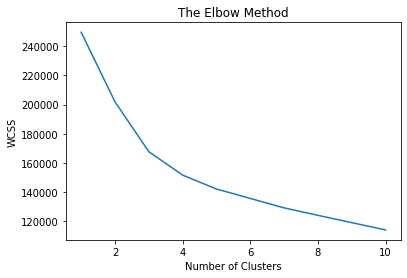

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  Kmeans = KMeans(n_clusters = i, init='k-means++', random_state=42)
  Kmeans.fit(train)
  wcss.append(Kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

###Finding the number of clusters using Silhouette Coefficient

In [ ]:
from sklearn.metrics import silhouette_score
  
for n_cluster in range(2, 11):
    Kmeans1 = KMeans(n_clusters=n_cluster).fit(train)
    label = Kmeans1.labels_
    sil_coeff = silhouette_score(train, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.8744789604109744
For n_clusters=3, The Silhouette Coefficient is 0.44366754781514894
For n_clusters=4, The Silhouette Coefficient is 0.3690598781147069
For n_clusters=5, The Silhouette Coefficient is 0.3131045231709387
For n_clusters=6, The Silhouette Coefficient is 0.31862331438749003
For n_clusters=7, The Silhouette Coefficient is 0.30951065665330196
For n_clusters=8, The Silhouette Coefficient is 0.18303696098695285
For n_clusters=9, The Silhouette Coefficient is 0.1769354660713655
For n_clusters=10, The Silhouette Coefficient is 0.18864688782716985


###Applying the Kmeans Algorithm for 5 clusters on train data

In [ ]:
Kmeans = KMeans(n_clusters = 5, init='k-means++', random_state=42)
Y_kmeans = Kmeans.fit_predict(train)

In [ ]:
print(Y_kmeans)

[0 0 0 ... 1 1 1]


###Joining the Districts and Clusters together for reference

In [ ]:
a = pd.DataFrame(X_train)
b = pd.DataFrame(Y_kmeans)
trainset = pd.concat([a.iloc[:,0], b], ignore_index=True, axis = 1)

In [ ]:
print(trainset)

                  0  1
0          ADILABAD  0
1         ANANTAPUR  0
2          CHITTOOR  0
3          CUDDAPAH  0
4     EAST GODAVARI  0
...             ... ..
8604            STF  1
8605           WEST  0
8606    LAKSHADWEEP  1
8607       KARAIKAL  1
8608     PUDUCHERRY  1

[8609 rows x 2 columns]


###Plotting the results for train data

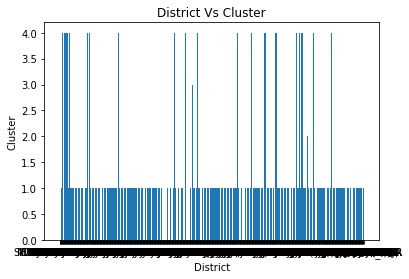

In [ ]:
plt.bar(trainset[0], trainset[1])
plt.title('District Vs Cluster')
plt.xlabel('District')
plt.ylabel('Cluster')
plt.show()

###Applying Kmeans onto test data

In [ ]:
Kmeans_test = KMeans(n_clusters = 5, init='k-means', random_state=42)
Y_kmeans_test = Kmeans.fit_predict(test)

###Joining the districts and clusters for test data

In [ ]:
a = pd.DataFrame(X_test)
b = pd.DataFrame(Y_kmeans_test)
testset = pd.concat([a.iloc[:,0], b], ignore_index=True, axis = 1)

In [ ]:
print(testset)

               0  1
0       ADILABAD  3
1      ANANTAPUR  3
2       CHITTOOR  3
3       CUDDAPAH  3
4      CYBERABAD  2
..           ... ..
783          STF  0
784         WEST  2
785  LAKSHADWEEP  0
786     KARAIKAL  0
787   PUDUCHERRY  0

[788 rows x 2 columns]


###Visualizing results for test data

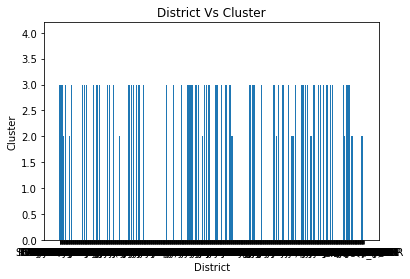

In [ ]:
plt.bar(testset[0], testset[1])
plt.title('District Vs Cluster')
plt.xlabel('District')
plt.ylabel('Cluster')
plt.show()

##These results are not adequate. The initial intuition to compare the cluster centroids would not be very helpful. This is because the data  is not forming optimal clusters. We will now try to preprocess the data better.

##Applying Feature Scaling to original data again

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_vals[:,2:] = sc.fit_transform(x_train_vals[:,2:])
x_test_vals[:,2:] = sc.transform(x_test_vals[:,2:])

In [ ]:
display(x_train_vals)

array([['ADILABAD', 2001, 1.15834478099478, ..., -0.07243098488497635,
        0.406186562461889, 0.21914665054412608],
       ['ANANTAPUR', 2001, 2.240488258804757, ..., -0.07243098488497635,
        0.9732153426377105, -0.2568454995502764],
       ['CHITTOOR', 2001, 1.15834478099478, ..., -0.07243098488497635,
        1.826944067846251, 0.05965189868003309],
       ...,
       ['LAKSHADWEEP', 2012, -1.0275850441813743, ...,
        -0.07243098488497635, -0.7469843275586022, -0.7066705419169762],
       ['KARAIKAL', 2012, -0.9193706964003766, ..., -0.07243098488497635,
        -0.46665549241549936, -0.48238104710809543],
       ['PUDUCHERRY', 2012, -0.5081561748325852, ...,
        -0.07243098488497635, 0.6482887382672959, 0.3126006067144931]],
      dtype=object)

In [ ]:
print(x_test_vals)

[['ADILABAD' 2013 1.0501304332137822 ... -0.07243098488497635
  1.6485529909370038 0.13939927461207957]
 ['ANANTAPUR' 2013 2.348702606585755 ... -0.07243098488497635
  2.9036616391913506 0.2914177099825432]
 ['CHITTOOR' 2013 0.530701563864993 ... -0.07243098488497635
  2.7316416721717194 0.6683486665363567]
 ...
 ['LAKSHADWEEP' 2013 -1.0275850441813743 ... -0.07243098488497635
  -0.7469843275586022 -0.7153929111595437]
 ['KARAIKAL' 2013 -0.8977278268441771 ... -0.07243098488497635
  -0.543108811090891 -0.5216317086996496]
 ['PUDUCHERRY' 2013 -0.4865133052763857 ... -0.07243098488497635
  0.5654643097022883 0.18550322632279395]]


#We now try to reduce the dimensions of the features. We apply Principal Component analysis to reduce the number of features to 2. These will be the 2 best projections of the 29 features on a principal dimension. This will also help us to visualize the results better.

#Applying Kmeans after PCA 

##Applying PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

##Merging the data by dropping the original features, while concatenating the 2 new principal features.

In [ ]:
pca_train_result = pca.fit_transform(x_train_vals[:,2:])
x_train = pd.DataFrame(x_train_vals)
pca_train = pd.DataFrame(pca_train_result)
x_train.drop(x_train.iloc[:,2:], inplace = True, axis = 1) 
x_trainset = pd.concat([x_train, pca_train], ignore_index=True, axis = 1)

In [ ]:
print(x_trainset)

                  0     1         2         3
0          ADILABAD  2001  1.428720 -0.785335
1         ANANTAPUR  2001  1.513024 -2.004361
2          CHITTOOR  2001  2.193210 -2.650716
3          CUDDAPAH  2001 -0.024711 -1.138970
4     EAST GODAVARI  2001  2.279901 -2.273365
...             ...   ...       ...       ...
8604            STF  2012 -2.857952  0.496852
8605           WEST  2012  5.198004  4.855982
8606    LAKSHADWEEP  2012 -2.872274  0.489674
8607       KARAIKAL  2012 -2.437590  0.327408
8608     PUDUCHERRY  2012 -0.729543 -0.375557

[8609 rows x 4 columns]


In [ ]:
pca_test_result = pca.transform(x_test_vals[:,2:])
x_test = pd.DataFrame(x_test_vals)
pca_test = pd.DataFrame(pca_test_result)
x_test.drop(x_test.iloc[:,2:], inplace = True, axis = 1)
x_testset = pd.concat([x_test, pca_test], ignore_index=True, axis = 1)

In [ ]:
print(x_testset)

               0     1          2         3
0       ADILABAD  2013   3.422947 -2.747885
1      ANANTAPUR  2013   3.688475 -2.866613
2       CHITTOOR  2013   1.783107 -1.790103
3       CUDDAPAH  2013   3.601937 -3.637887
4      CYBERABAD  2013  16.820744 -7.324309
..           ...   ...        ...       ...
783          STF  2013  -2.785471  0.433639
784         WEST  2013  10.421459  6.033382
785  LAKSHADWEEP  2013  -2.859908  0.528613
786     KARAIKAL  2013  -2.523605  0.365329
787   PUDUCHERRY  2013  -0.900950 -0.175523

[788 rows x 4 columns]


##Extracting the features to apply Kmeans

In [ ]:
k_train = x_trainset.iloc[:,2:].values
k_test = x_testset.iloc[:,2:].values

In [ ]:
print(k_train)

[[ 1.42871999 -0.78533508]
 [ 1.51302397 -2.00436132]
 [ 2.19321035 -2.6507163 ]
 ...
 [-2.87227417  0.48967384]
 [-2.43758956  0.32740834]
 [-0.72954313 -0.37555689]]


In [ ]:
print(k_test)

[[ 3.42294738 -2.74788518]
 [ 3.68847469 -2.86661272]
 [ 1.78310673 -1.79010326]
 ...
 [-2.85990758  0.52861282]
 [-2.52360548  0.36532886]
 [-0.90095024 -0.175523  ]]


##Applying the Kmeans

###Using Silhouette Coefficient to find number of optimal Clusters

In [ ]:
from sklearn.metrics import silhouette_score
  
for n_cluster in range(2, 11):
    kmeans1 = KMeans(n_clusters=n_cluster).fit(k_train)
    label = kmeans1.labels_
    sil_coeff = silhouette_score(k_train, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.8400897080419875
For n_clusters=3, The Silhouette Coefficient is 0.5967175127312884
For n_clusters=4, The Silhouette Coefficient is 0.53189118653319
For n_clusters=5, The Silhouette Coefficient is 0.443216850901647
For n_clusters=6, The Silhouette Coefficient is 0.43148804372418736
For n_clusters=7, The Silhouette Coefficient is 0.45490812654495116
For n_clusters=8, The Silhouette Coefficient is 0.4189107804954833
For n_clusters=9, The Silhouette Coefficient is 0.42272323685262275
For n_clusters=10, The Silhouette Coefficient is 0.43379173660819537


###Using the Elbow method to find number of optimal clusters

Text(0, 0.5, 'WCSS')

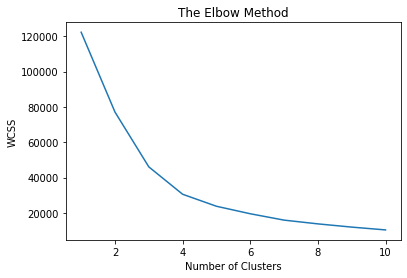

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state=42)
  kmeans.fit(k_train)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

###Applying 2 Cluster Kmeans as suggested by Silhouette Coeff Method

In [ ]:
kmeans3 = KMeans(n_clusters = 2, init='k-means++', random_state=42)
y_kmeans1 = kmeans3.fit_predict(k_train)

In [ ]:
print(y_kmeans1)

[0 0 0 ... 0 0 0]


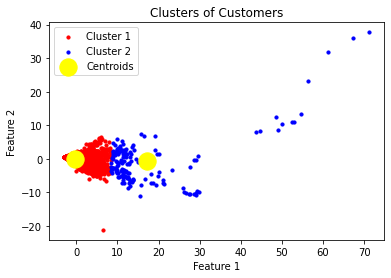

In [ ]:
plt.scatter(k_train[y_kmeans1 == 0, 0],k_train[y_kmeans1 == 0, 1], s = 10, c = 'red', label =  'Cluster 1')
plt.scatter(k_train[y_kmeans1 == 1, 0],k_train[y_kmeans1 == 1, 1], s = 10, c = 'blue', label =  'Cluster 2')
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

###This gives us some outliers. For this Outlier Detection, we increase the number of clusters to 4 so that the algorithm can identify the outliers as 1 cluster.

In [ ]:
kmeans2 = KMeans(n_clusters = 4, init='k-means++', random_state=42)
y_kmeans = kmeans2.fit_predict(k_train)

In [ ]:
print(y_kmeans)

[0 0 0 ... 3 3 3]


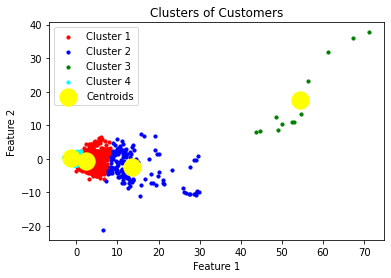

In [ ]:
plt.scatter(k_train[y_kmeans == 0, 0],k_train[y_kmeans == 0, 1], s = 10, c = 'red', label =  'Cluster 1')
plt.scatter(k_train[y_kmeans == 1, 0],k_train[y_kmeans == 1, 1], s = 10, c = 'blue', label =  'Cluster 2')
plt.scatter(k_train[y_kmeans == 2, 0],k_train[y_kmeans == 2, 1], s = 10, c = 'green', label =  'Cluster 3')
plt.scatter(k_train[y_kmeans == 3, 0],k_train[y_kmeans == 3, 1], s = 10, c = 'cyan', label =  'Cluster 4')
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

###Now that the outliers are identified, we remove them by first adding the clusters to the original data. We do this so the respective districts and data gets removed

In [ ]:
y = pd.DataFrame(y_kmeans)
x_result = pd.concat([x_trainset, y], ignore_index=True, axis = 1)

In [ ]:
print(x_result)

                  0     1         2         3  4
0          ADILABAD  2001  1.428720 -0.785335  0
1         ANANTAPUR  2001  1.513024 -2.004361  0
2          CHITTOOR  2001  2.193210 -2.650716  0
3          CUDDAPAH  2001 -0.024711 -1.138970  3
4     EAST GODAVARI  2001  2.279901 -2.273365  0
...             ...   ...       ...       ... ..
8604            STF  2012 -2.857952  0.496852  3
8605           WEST  2012  5.198004  4.855982  0
8606    LAKSHADWEEP  2012 -2.872274  0.489674  3
8607       KARAIKAL  2012 -2.437590  0.327408  3
8608     PUDUCHERRY  2012 -0.729543 -0.375557  3

[8609 rows x 5 columns]


In [ ]:
outliers = (x_result == 2).any(axis=1)
for i in reversed(range(len(y_kmeans))):
  if outliers[i]:
    x_result.drop(x_result.index[i],inplace=True)
x_result.reset_index(drop=True,inplace=True)
print(x_result)

                  0     1         2         3  4
0          ADILABAD  2001  1.428720 -0.785335  0
1         ANANTAPUR  2001  1.513024 -2.004361  0
2          CHITTOOR  2001  2.193210 -2.650716  0
3          CUDDAPAH  2001 -0.024711 -1.138970  3
4     EAST GODAVARI  2001  2.279901 -2.273365  0
...             ...   ...       ...       ... ..
8592            STF  2012 -2.857952  0.496852  3
8593           WEST  2012  5.198004  4.855982  0
8594    LAKSHADWEEP  2012 -2.872274  0.489674  3
8595       KARAIKAL  2012 -2.437590  0.327408  3
8596     PUDUCHERRY  2012 -0.729543 -0.375557  3

[8597 rows x 5 columns]


###We again extract the features to apply Kmeans

In [ ]:
new_train = x_result.iloc[:,2:4]
print(new_train)

             2         3
0     1.428720 -0.785335
1     1.513024 -2.004361
2     2.193210 -2.650716
3    -0.024711 -1.138970
4     2.279901 -2.273365
...        ...       ...
8592 -2.857952  0.496852
8593  5.198004  4.855982
8594 -2.872274  0.489674
8595 -2.437590  0.327408
8596 -0.729543 -0.375557

[8597 rows x 2 columns]


###Again using the Elbow Method

Text(0, 0.5, 'WCSS')

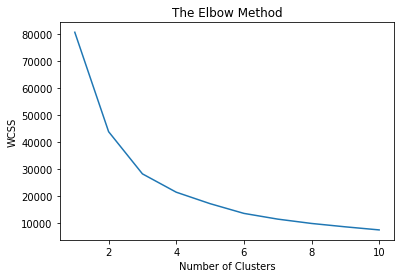

In [ ]:
wcss = []
for i in range(1,11):
  new_kmeans = KMeans(n_clusters = i, init='k-means++', random_state=42)
  new_kmeans.fit(new_train)
  wcss.append(new_kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

###Applying Kmeans with 4 Clusters

In [ ]:
new_kmeans1 = KMeans(n_clusters = 4, init='k-means++', random_state=42)
new_kmeans_result = new_kmeans1.fit_predict(new_train)

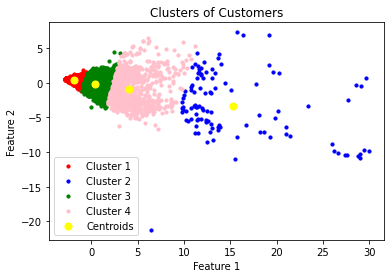

In [ ]:
new_train = new_train.values
plt.scatter(new_train[new_kmeans_result == 0, 0],new_train[new_kmeans_result == 0, 1], s = 10, c = 'red', label =  'Cluster 1')
plt.scatter(new_train[new_kmeans_result == 1, 0],new_train[new_kmeans_result == 1, 1], s = 10, c = 'blue', label =  'Cluster 2')
plt.scatter(new_train[new_kmeans_result == 2, 0],new_train[new_kmeans_result == 2, 1], s = 10, c = 'green', label =  'Cluster 3')
plt.scatter(new_train[new_kmeans_result == 3, 0],new_train[new_kmeans_result == 3, 1], s = 10, c = 'pink', label =  'Cluster 4')
plt.scatter(new_kmeans1.cluster_centers_[:, 0], new_kmeans1.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()